In [ ]:
from google.colab import files
uploaded = files.upload()

Saving norm540.txt to norm540.txt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aggregateRockData-1.xlsx to aggregateRockData-1.xlsx


In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler, Normalizer, MinMaxScaler
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
column_names_feature = ['Rock number', 'Subtype number', 'Token number','Porphyritic texture', 'Presence of holes', 'Salient green hue' 'Pegmatitic texture', 'Conchoidal fracture', 'Angular fragments', 'Rounded fragments', 'Straight stripes', 'Curved stripes', 'Physical layers', 'Veins', 'Oily/shimmery texture', 'Splotchy texture', 'Single translucent crystal', 'Multiple cubic crystals', 'Sandy texture', 'Fragments', 'Stripes', 'Crystals']

data_feature = pd.read_csv("norm540.txt", names = column_names_feature,delim_whitespace=True)

In [ ]:
column_names_label= ["Rock number",
"Category number",
"Subtype number",
"Token number",
"Stimulus Type",
"Igneous",
"Metamorphic",
"Sedimentary",
"Old",
"New",
"Igneous",
"Metamorphic",
"Sedimentary",
"Old"]
data_label = pd.read_excel("aggregateRockData-1.xlsx", names= column_names_label, header=None)

In [ ]:
data_feature.head(5)

,Rock number,Subtype number,Token number,Porphyritic texture,Presence of holes,Salient green huePegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,Straight stripes,...,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments,Stripes,Crystals
1,1,1,1.690468,-0.159688,-0.646115,-0.252007,-0.609794,0.579927,0.375313,-0.352386,...,-0.759128,-0.013842,-0.540653,0.946521,-0.227922,-0.225045,-0.116312,0.635812,-0.409247,-0.310419
2,1,2,1.690468,-0.159688,-0.530724,0.127922,-0.482150,2.865772,0.375313,-0.352386,...,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,0.185510,-0.401124,2.042938,-0.409247,-0.034059
3,1,3,1.665576,-0.407623,0.858984,-0.631936,-0.443857,2.611790,-0.405184,-0.352386,...,-0.529150,-0.512160,-0.540653,1.245422,-0.227922,-0.225045,-0.401124,1.665865,-0.409247,-0.310419
4,1,4,2.233118,-0.407623,-0.415333,-0.424702,-1.120369,0.071962,4.017633,-0.352386,...,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.116312,2.640737,-0.409247,-0.310419
5,1,5,2.213204,-0.159688,1.129901,-0.044773,-1.082076,1.341876,3.757467,-0.352386,...,-0.759128,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.401124,2.659131,-0.409247,-0.310419


In [ ]:
data_label.head()

,Rock number,Category number,Subtype number,Token number,Stimulus Type,Igneous,Metamorphic,Sedimentary,Old,New,Igneous.1,Metamorphic.1,Sedimentary.1,Old.1
0,1,1,1,1,2,57,19,6,46,36,0.695122,0.231707,0.073171,0.560976
1,2,1,1,2,3,59,10,13,24,58,0.719512,0.121951,0.158537,0.292683
2,3,1,1,3,3,37,28,17,20,62,0.451220,0.341463,0.207317,0.243902
3,4,1,1,4,3,41,11,30,29,53,0.500000,0.134146,0.365854,0.353659
4,5,1,1,5,3,42,6,34,25,57,0.512195,0.073171,0.414634,0.304878


In [ ]:
X = data_feature.iloc[:,3:]

In [ ]:
y = data_label[['Rock number','Category number']]

In [ ]:
y = y.set_index('Rock number')
y.head()

,Category number
Rock number,
1,1
2,1
3,1
4,1
5,1


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 1 to 720
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Category number  540 non-null    int64
dtypes: int64(1)
memory usage: 8.4 KB


In [ ]:
y.describe()

,Category number
count,540.000000
mean,2.000000
std,0.817254
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.000000


# **1. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require?**

In [ ]:
X.head()

,Porphyritic texture,Presence of holes,Salient green huePegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments,Stripes,Crystals
1,-0.159688,-0.646115,-0.252007,-0.609794,0.579927,0.375313,-0.352386,-0.260224,-0.759128,-0.013842,-0.540653,0.946521,-0.227922,-0.225045,-0.116312,0.635812,-0.409247,-0.310419
2,-0.159688,-0.530724,0.127922,-0.482150,2.865772,0.375313,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,0.185510,-0.401124,2.042938,-0.409247,-0.034059
3,-0.407623,0.858984,-0.631936,-0.443857,2.611790,-0.405184,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,1.245422,-0.227922,-0.225045,-0.401124,1.665865,-0.409247,-0.310419
4,-0.407623,-0.415333,-0.424702,-1.120369,0.071962,4.017633,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.116312,2.640737,-0.409247,-0.310419
5,-0.159688,1.129901,-0.044773,-1.082076,1.341876,3.757467,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.401124,2.659131,-0.409247,-0.310419


In [ ]:
X.isnull().sum()

Porphyritic texture                    0
Presence of holes                      0
Salient green huePegmatitic texture    0
Conchoidal fracture                    0
Angular fragments                      0
Rounded fragments                      0
Straight stripes                       0
Curved stripes                         0
Physical layers                        0
Veins                                  0
Oily/shimmery texture                  0
Splotchy texture                       0
Single translucent crystal             0
Multiple cubic crystals                0
Sandy texture                          0
Fragments                              0
Stripes                                0
Crystals                               0
dtype: int64

There are no missing or null values in the dataset.

Statistical Value for each of the attribute

In [ ]:
X.describe()

,Porphyritic texture,Presence of holes,Salient green huePegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments,Stripes,Crystals
count,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02
mean,9.629630e-08,5.370370e-08,-6.296296e-08,-4.074074e-08,-1.537037e-07,-1.666667e-08,-1.814815e-07,-1.481481e-08,-1.166667e-07,-1.629630e-07,1.703704e-07,-6.851852e-08,-5.555556e-09,3.388889e-07,1.203704e-07,-1.148148e-07,-1.759259e-07,3.018519e-07
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01
min,-4.076230e-01,-1.187950e+00,-1.322715e+00,-1.248012e+00,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-7.591280e-01,-5.121600e-01,-5.406530e-01,-8.468870e-01,-2.279220e-01,-2.250450e-01,-6.859370e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01
25%,-4.076230e-01,-7.615050e-01,-8.046310e-01,-6.991450e-01,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-7.591280e-01,-5.121600e-01,-5.406530e-01,-8.468870e-01,-2.279220e-01,-2.250450e-01,-6.859370e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01
50%,-4.076230e-01,-3.751970e-01,-1.829290e-01,-2.715380e-01,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-2.991730e-01,-5.121600e-01,-5.406530e-01,-2.490840e-01,-2.279220e-01,-2.250450e-01,-4.011240e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01
75%,-1.596880e-01,5.843033e-01,5.769290e-01,3.571070e-01,-1.820210e-01,-1.450180e-01,-3.523860e-01,-2.602240e-01,3.907600e-01,-1.384200e-02,-1.658870e-01,3.487180e-01,-2.279220e-01,-2.250450e-01,1.685000e-01,1.042300e-02,-2.072980e-01,-3.104190e-01
max,4.551072e+00,2.750390e+00,4.175892e+00,3.813059e+00,4.643652e+00,4.798130e+00,4.888957e+00,5.862693e+00,3.610446e+00,8.457556e+00,3.207009e+00,4.832237e+00,7.120010e+00,7.986072e+00,5.010309e+00,3.137369e+00,3.629722e+00,5.216791e+00


Value distribution for each of the attribute

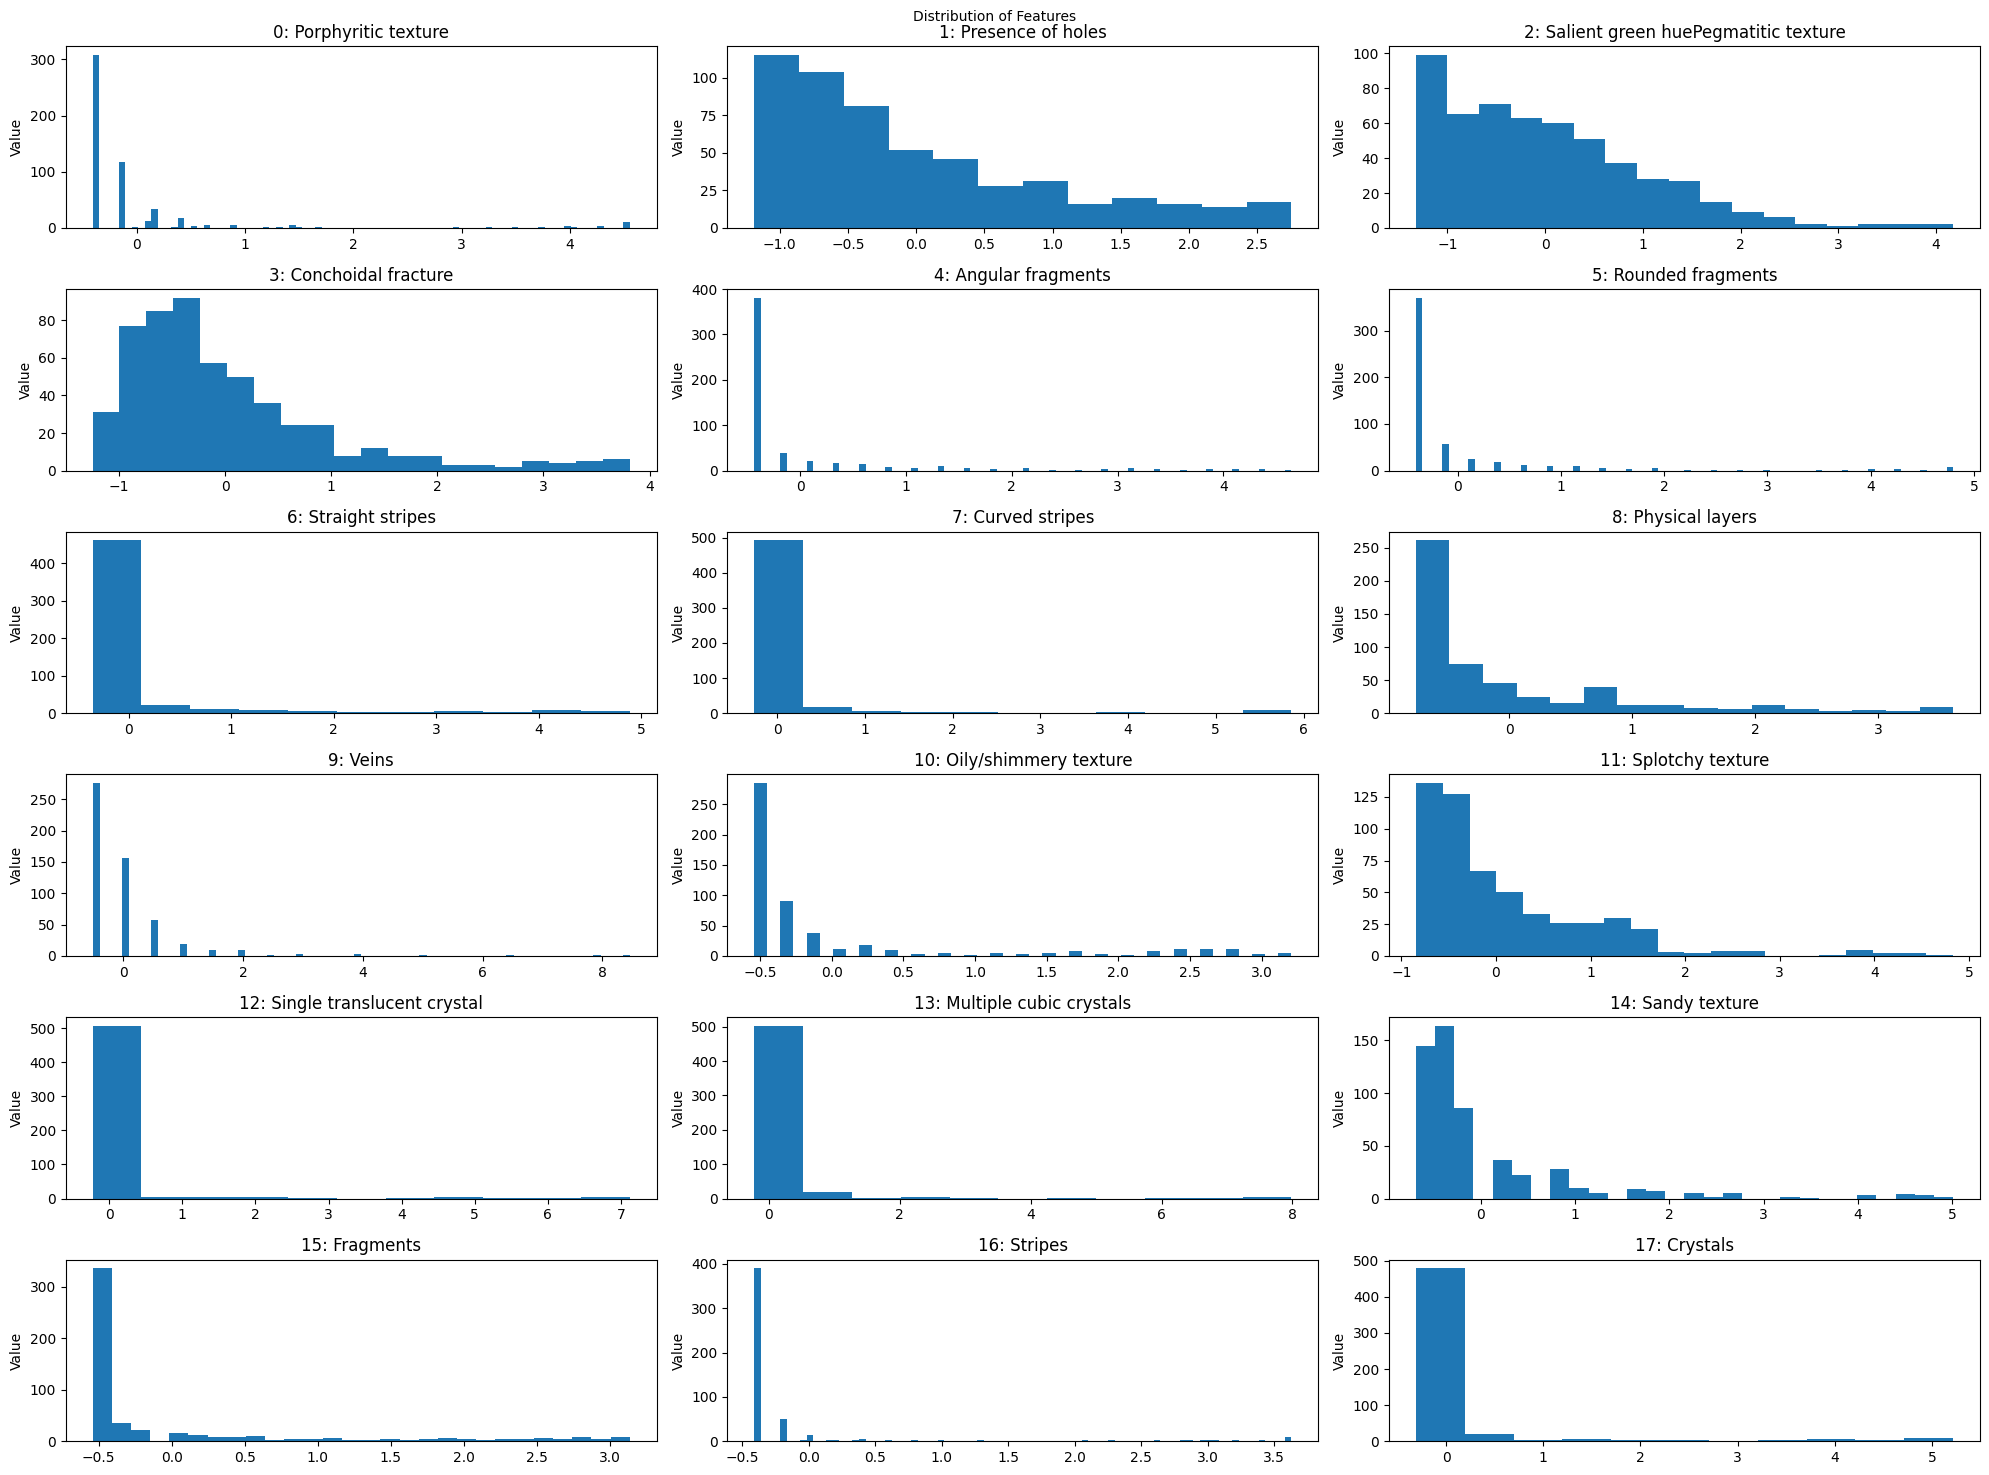

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(20, 15))
for i, ax in enumerate(axes.ravel()):
    ax.hist(X.iloc[:,i],bins="auto")
    ax.set_title("{}: {}".format(i,column_names_feature[i+3] ))
    ax.set_ylabel("Value")
fig.suptitle("Distribution of Features", fontsize=10)
plt.tight_layout()
plt.show()

# Special Treatment

1) From the statistical distribution and histograms it is clear that some features might require special treatment. Although for most of the feature standard deviation is around 1. For many features the difference between 75th percentile and max is large. Which indicated presence of outliers. For example "Poriphyritic Features", "Angular Fragments", "Rounded Fragments", "Veins". For these examples 75th perccentile is negative while the max value is positive.

2) Scaling will be done with StandardScalar or MinMaxScalar as some of the models we will use are sensitive to scale

# **2. Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.**

#1) PCC for relationship between the X features
 Following figure gives the relationship between data attributes.

Text(0.5, 1.0, 'Pearson Correlation Coefficients')

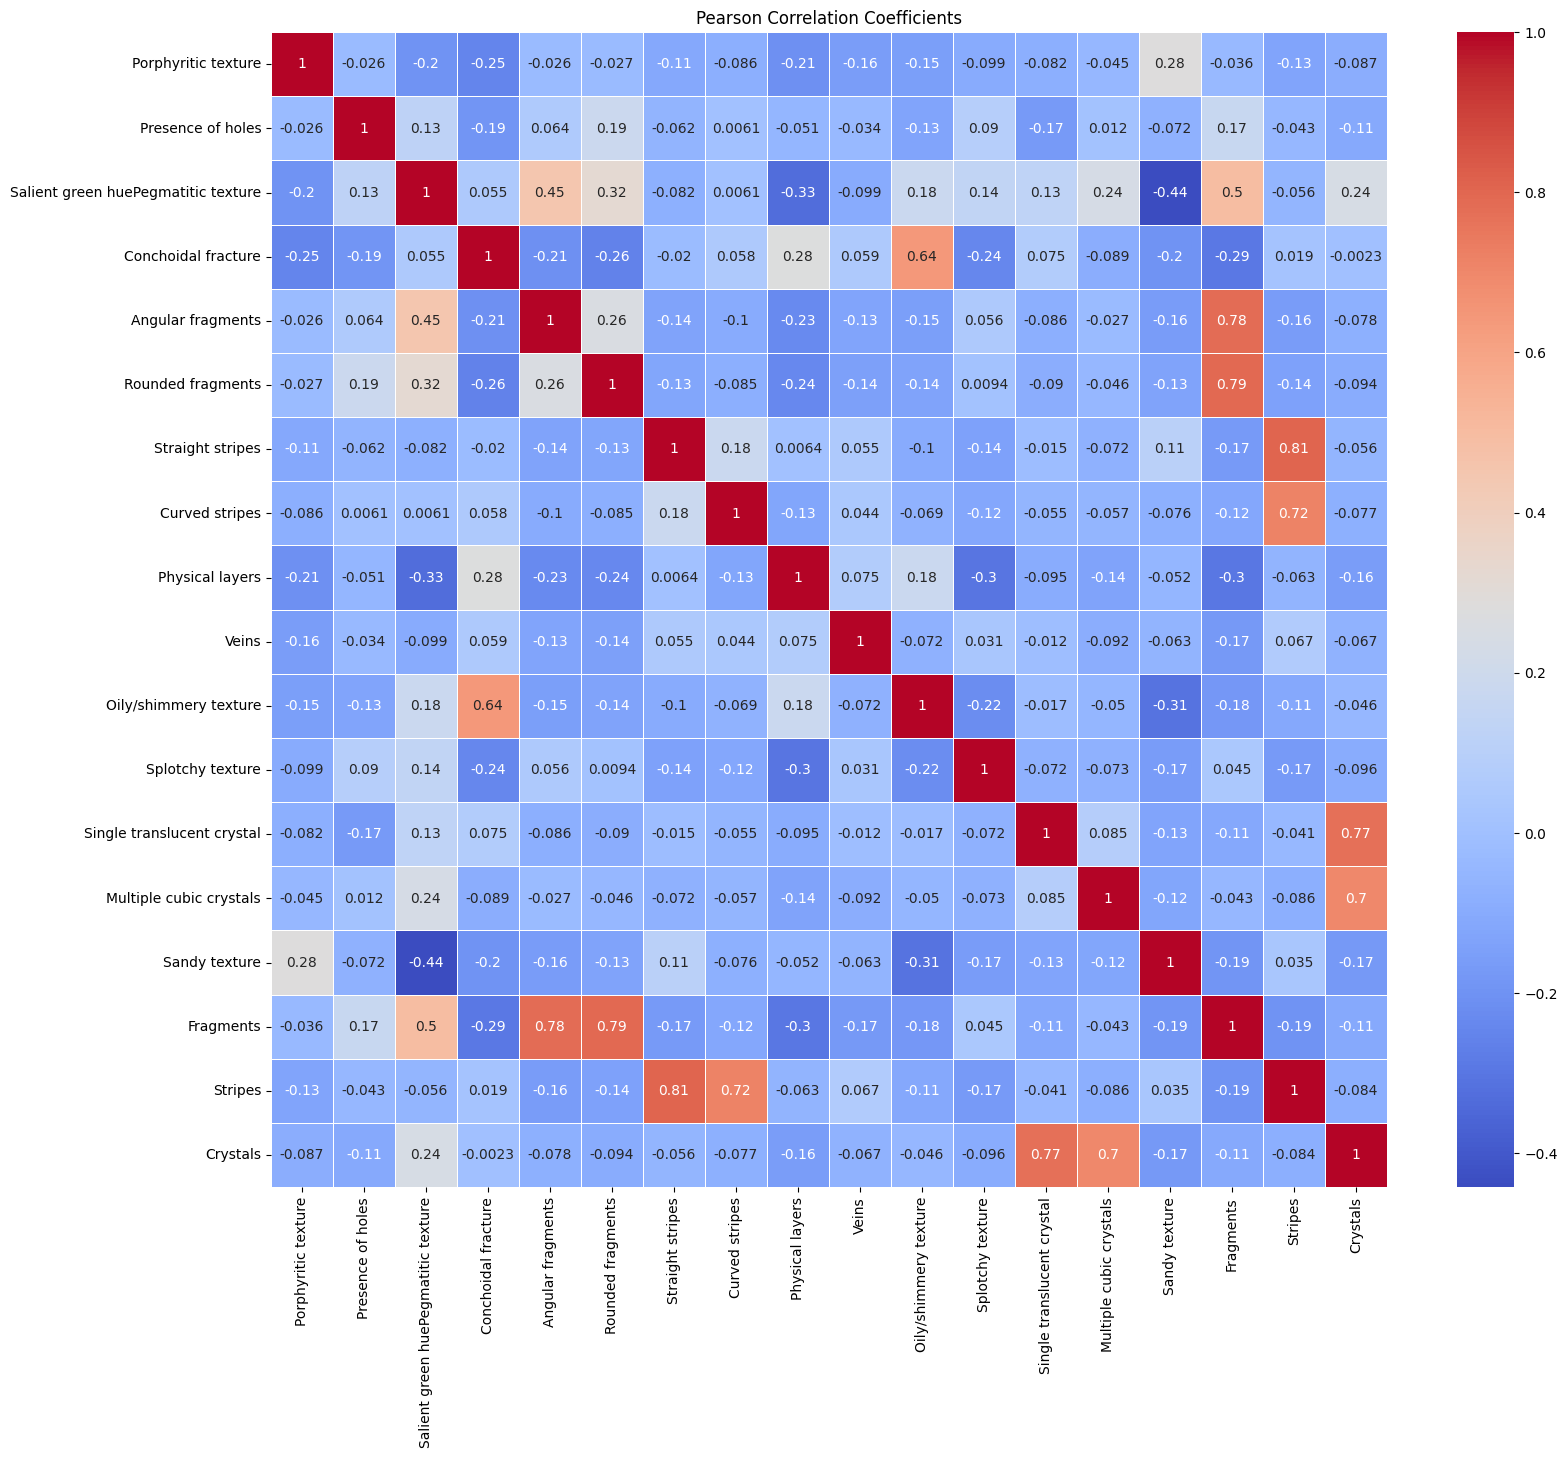

In [ ]:
correlation_matrix = X.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Pearson Correlation Coefficients')

Following features have high co-relation:


*   Fragments- Angular Fragments
*   Fragments- Rounded Fragments
*   Stripe - Straight Stripes
*   Stripes - Curved Stripes
*   Crystals- Single Transluscent Crystal
*   Crystals- Multiple Cubic Crystals
Even from the name it is clear that the features having high co-relations have a set-subset relationship. As in stripes to straight, curved stripes.




#2) PCC for the relationship between the data attributed and the Label
Following figure gives the relationship between data attributes and label.


In [ ]:
from operator import index
data = pd.concat([X,y.set_axis(X.index)],axis =1)

Text(0.5, 1.0, 'Pearson Correlation Coefficients')

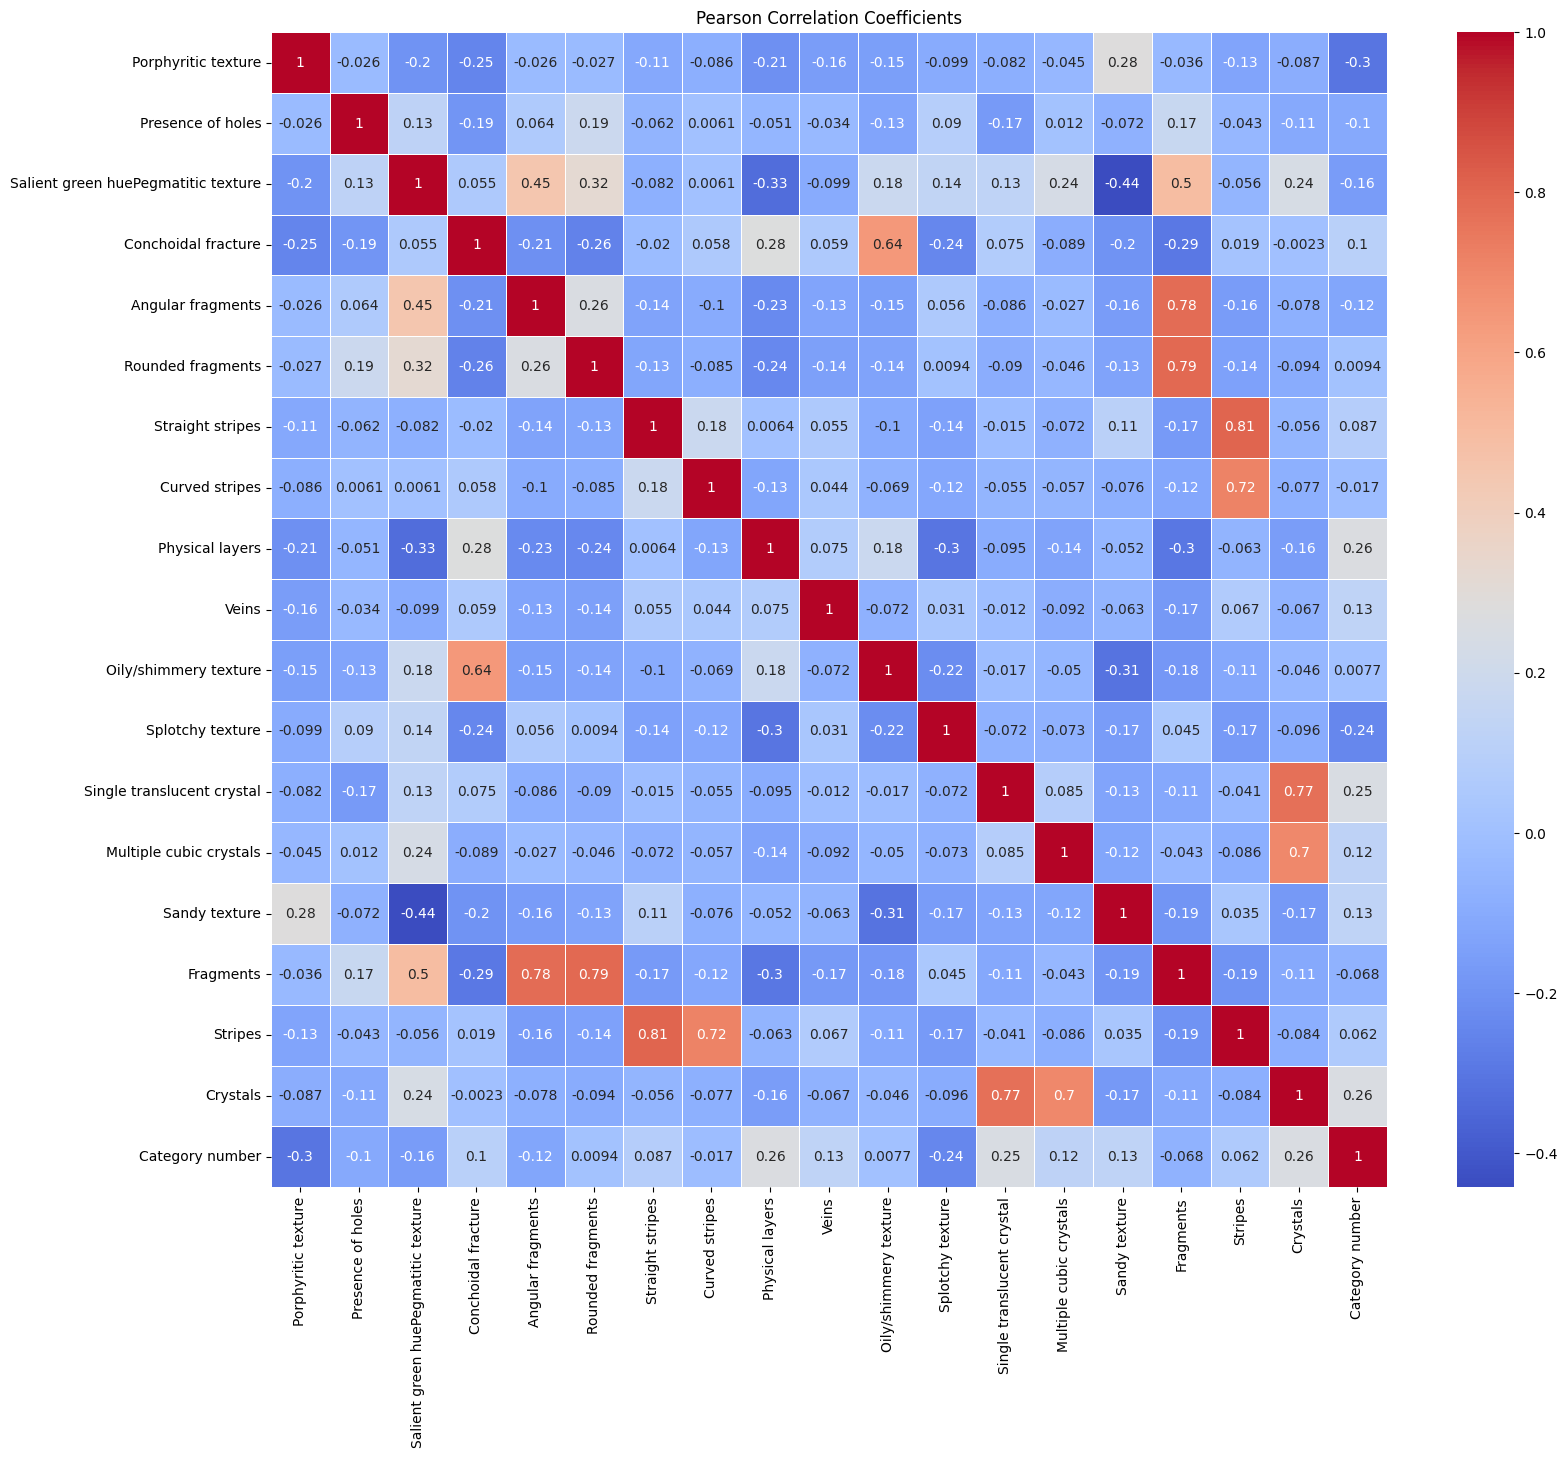

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Pearson Correlation Coefficients')

#Discussion

Even though not close to 1 or -1, following features have high co-relation with label as compared to others features.


*   Crystals 0.26
*   Single Translucent Crystal 0.25
*   Physical Layers 0.26
*   Splotchy Texture -.24
*   Porphyritic Texture -0.3



#Scatter plots

Distribution of each feature against label





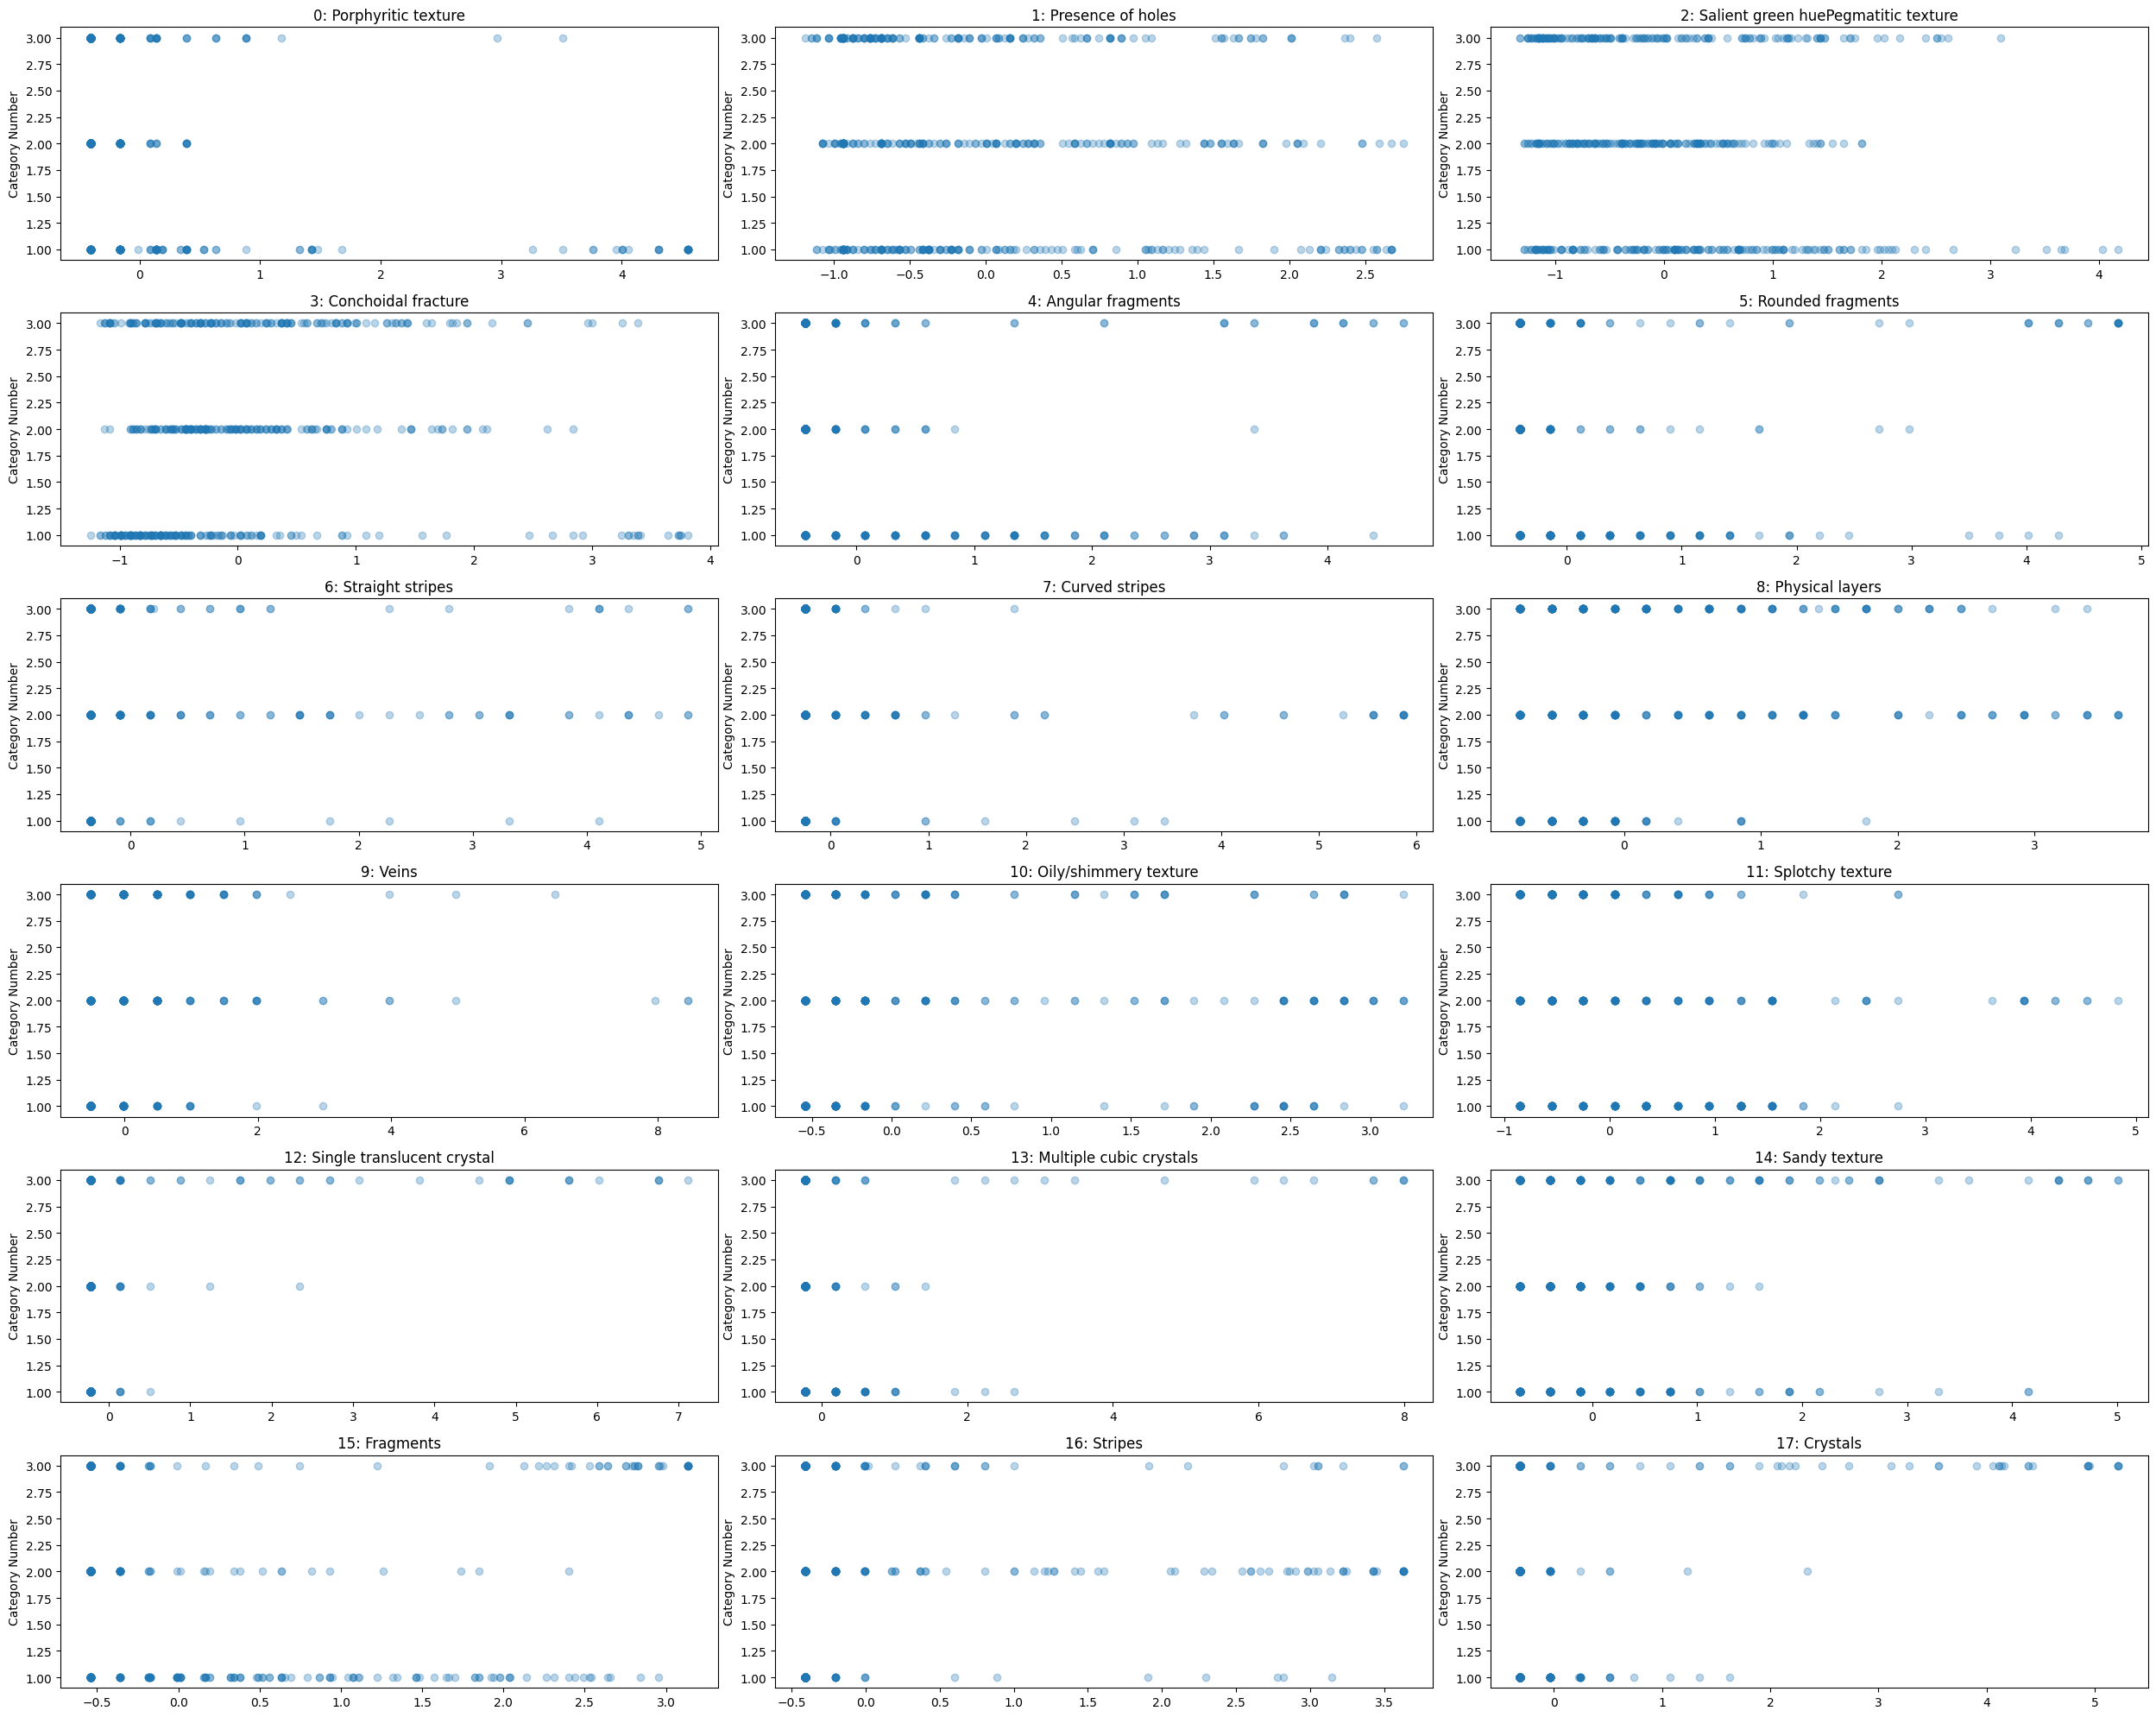

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(25, 20))
for i, ax in enumerate(axes.ravel()):
    ax.plot(X.iloc[:,i], y, 'o', alpha=.3)
    ax.set_title("{}: {}".format(i, column_names_feature[i+3]))
    ax.set_ylabel("Category Number")
plt.tight_layout()
plt.show()

In [ ]:
#We have used scaling here

scaling = StandardScaler()

cols = X.columns
inx = X.index
X_S = pd.DataFrame(scaling.fit_transform(X), index =inx, columns=cols)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaling = MinMaxScaler()
# cols = X.columns
# inx = X.index
# X_S = pd.DataFrame(scaling.fit_transform(X), index =inx, columns=cols)



## **3. Select 20% of the data for testing and 20% for validation and use the remaining 60% of the data for training. Describe how you did that and verify that your test and validation portions of the data are representative of the entire dataset**

# 1) Splitting the Dataset

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X_S, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

We have made use of train_test_split from sklearn.model_selection to split the data set. We use a temporary variable to split the data between validation amd test dataset.

### Verifying if the Test and Validation sets are representative of data

In [ ]:
X_train.describe()

,Porphyritic texture,Presence of holes,Salient green huePegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments,Stripes,Crystals
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,-0.013235,0.022886,0.021639,0.022122,0.033582,-0.068799,-0.005394,-0.001324,0.030916,0.015394,0.052776,-0.033242,0.026105,-0.005834,-0.024914,-0.025082,-0.002922,0.017306
std,0.997412,1.019720,1.029661,0.997612,1.083701,0.855140,1.006651,0.993938,1.000320,0.982735,1.024797,0.940356,1.017149,0.979905,1.034642,0.983449,0.999669,1.003656
min,-0.408001,-1.189052,-1.323941,-1.166124,-0.436408,-0.405560,-0.352713,-0.260465,-0.759832,-0.512635,-0.541155,-0.847672,-0.228133,-0.225254,-0.686573,-0.541893,-0.409626,-0.310707
25%,-0.408001,-0.762211,-0.805377,-0.655076,-0.436408,-0.405560,-0.352713,-0.260465,-0.759832,-0.512635,-0.541155,-0.847672,-0.228133,-0.225254,-0.686573,-0.541893,-0.409626,-0.310707
50%,-0.408001,-0.357969,-0.183099,-0.271790,-0.436408,-0.405560,-0.352713,-0.260465,-0.299450,-0.512635,-0.353598,-0.249315,-0.228133,-0.225254,-0.401496,-0.541893,-0.409626,-0.310707
75%,-0.159836,0.558481,0.631049,0.367020,-0.182190,-0.145152,-0.352713,-0.260465,0.391122,-0.013855,0.021516,0.349041,-0.228133,-0.225254,-0.116420,-0.173676,-0.207490,-0.310707
max,4.555292,2.672595,4.034565,3.816595,4.647957,4.802579,4.893490,5.868129,3.613794,7.966617,3.209983,4.238360,6.758875,7.993477,5.014955,3.140278,3.633087,5.221628


In [ ]:
X_valid.describe()

,Porphyritic texture,Presence of holes,Salient green huePegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments,Stripes,Crystals
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,0.039155,-0.167146,-0.061652,-0.052938,-0.024480,0.093554,0.121159,0.040290,-0.027753,-0.115458,-0.110377,0.044323,-0.054480,-0.012176,0.082939,0.041885,0.104707,-0.036652
std,1.008478,0.843977,0.948422,0.955725,0.967390,1.167904,1.109696,1.088428,1.033141,0.569551,0.924613,1.088339,0.999795,1.114449,1.061977,1.069915,1.094097,1.044288
min,-0.408001,-1.113727,-1.289370,-1.249169,-0.436408,-0.405560,-0.352713,-0.260465,-0.759832,-0.512635,-0.541155,-0.847672,-0.228133,-0.225254,-0.686573,-0.541893,-0.409626,-0.310707
25%,-0.408001,-0.877709,-0.865876,-0.709375,-0.436408,-0.405560,-0.352713,-0.260465,-0.759832,-0.512635,-0.541155,-0.623289,-0.228133,-0.225254,-0.686573,-0.541893,-0.409626,-0.310707
50%,-0.283919,-0.415718,-0.200384,-0.316507,-0.436408,-0.405560,-0.352713,-0.260465,-0.299450,-0.512635,-0.541155,-0.548494,-0.228133,-0.225254,-0.401496,-0.541893,-0.409626,-0.310707
75%,-0.159836,0.260948,0.359666,0.322304,-0.182190,-0.145152,-0.090403,-0.260465,0.160932,-0.013855,-0.353598,0.349041,-0.228133,-0.225254,0.239925,-0.003376,-0.207490,-0.310707
max,4.555292,2.577183,4.179764,3.746325,4.647957,4.802579,4.893490,5.868129,3.613794,2.978822,3.209983,4.537539,6.758875,7.993477,4.444801,3.140278,3.633087,5.221628


In [ ]:
X_test.describe()

,Porphyritic texture,Presence of holes,Salient green huePegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments,Stripes,Crystals
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,0.000551,0.098489,-0.003265,-0.013427,-0.076265,0.112843,-0.104975,-0.036318,-0.064996,0.069275,-0.047949,0.055403,-0.023835,0.029679,-0.008197,0.033361,-0.095942,-0.015265
std,1.012194,1.075144,0.970327,1.060439,0.745535,1.199688,0.854572,0.936414,0.975085,1.337149,0.999256,1.088339,0.958326,0.951316,0.823760,0.988745,0.901444,0.955453
min,-0.408001,-1.073554,-1.289370,-1.121408,-0.436408,-0.405560,-0.352713,-0.260465,-0.759832,-0.512635,-0.541155,-0.847672,-0.228133,-0.225254,-0.686573,-0.541893,-0.409626,-0.310707
25%,-0.408001,-0.762211,-0.786363,-0.757285,-0.436408,-0.405560,-0.352713,-0.260465,-0.759832,-0.512635,-0.541155,-0.548494,-0.228133,-0.225254,-0.401496,-0.541893,-0.409626,-0.310707
50%,-0.408001,-0.337883,-0.145070,-0.393164,-0.436408,-0.405560,-0.352713,-0.260465,-0.414545,-0.512635,-0.541155,-0.249315,-0.228133,-0.225254,-0.401496,-0.541893,-0.409626,-0.310707
75%,-0.097795,0.819607,0.586107,0.344662,-0.182190,-0.080051,-0.352713,-0.260465,-0.011711,-0.013855,-0.166041,0.349041,-0.228133,-0.225254,0.168656,0.173829,-0.409626,-0.241553
max,4.555292,2.752940,2.658639,3.305547,3.631085,4.802579,4.106560,5.868129,3.153412,8.465397,3.209983,4.836717,7.126612,6.349730,4.444801,3.140278,3.633087,5.221628


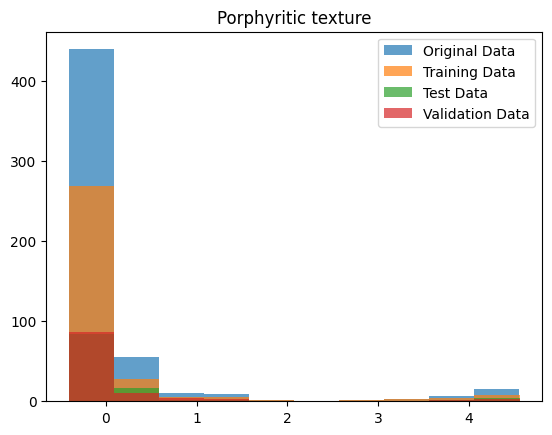

<Figure size 600x800 with 0 Axes>

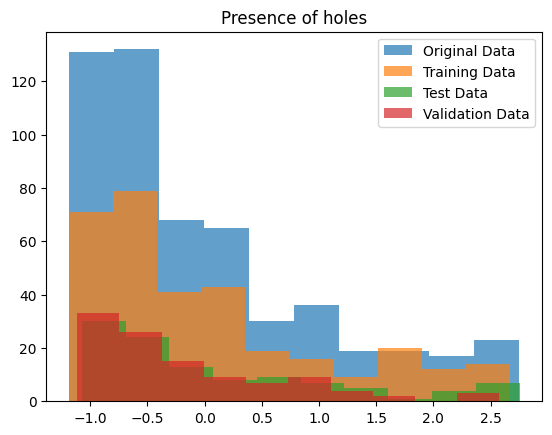

<Figure size 600x800 with 0 Axes>

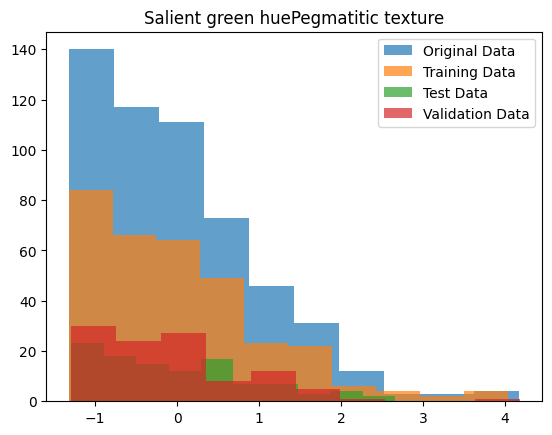

<Figure size 600x800 with 0 Axes>

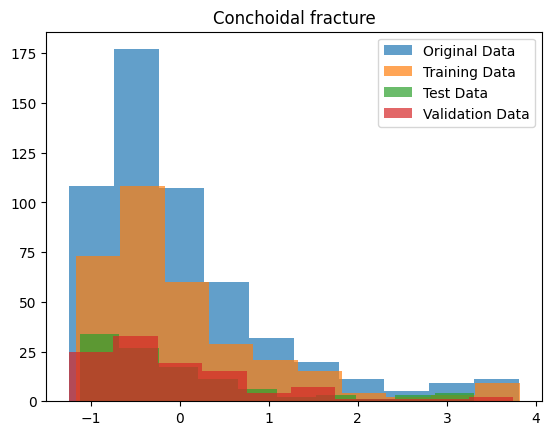

<Figure size 600x800 with 0 Axes>

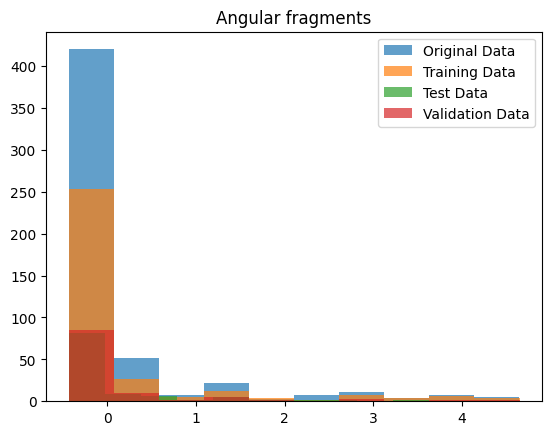

<Figure size 600x800 with 0 Axes>

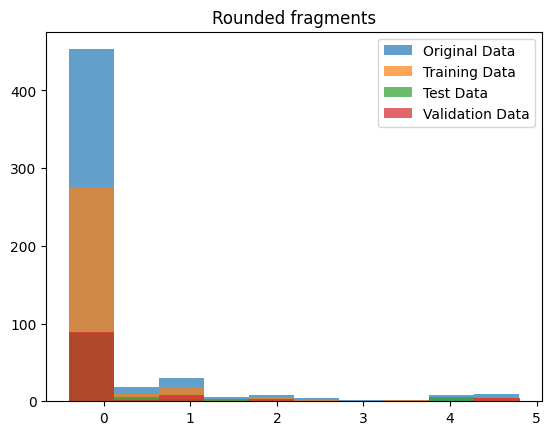

<Figure size 600x800 with 0 Axes>

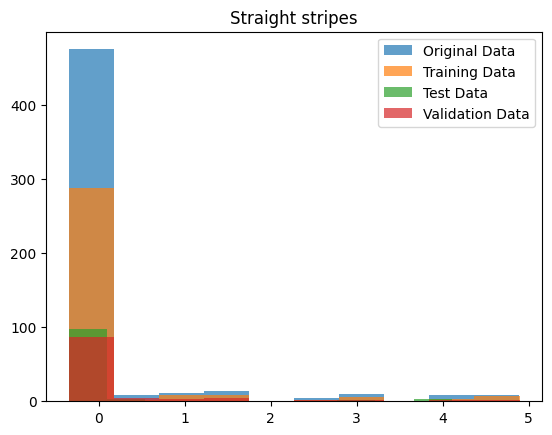

<Figure size 600x800 with 0 Axes>

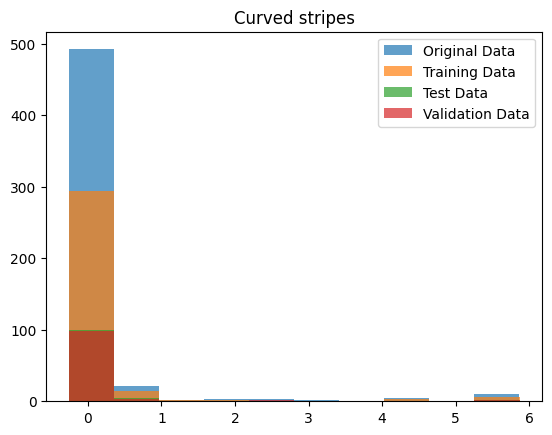

<Figure size 600x800 with 0 Axes>

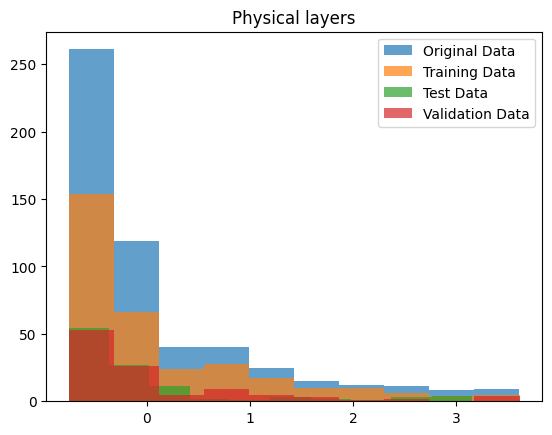

<Figure size 600x800 with 0 Axes>

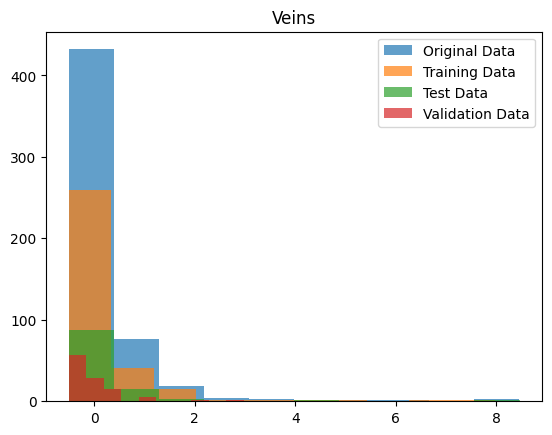

<Figure size 600x800 with 0 Axes>

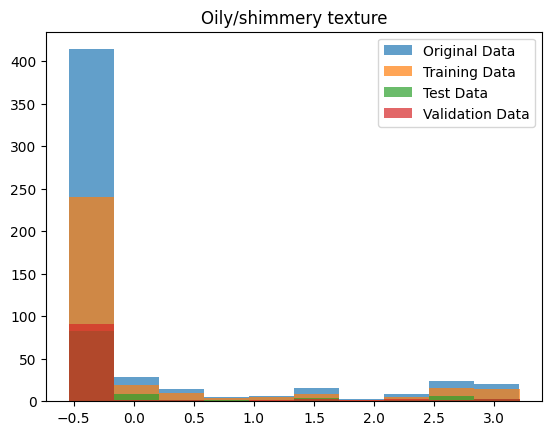

<Figure size 600x800 with 0 Axes>

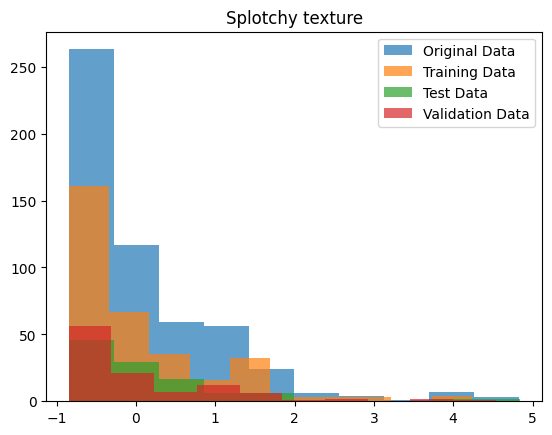

<Figure size 600x800 with 0 Axes>

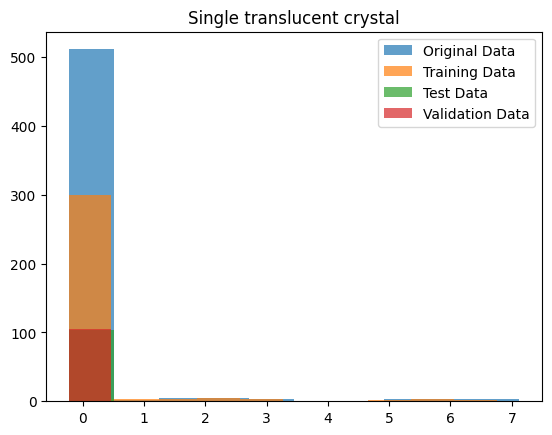

<Figure size 600x800 with 0 Axes>

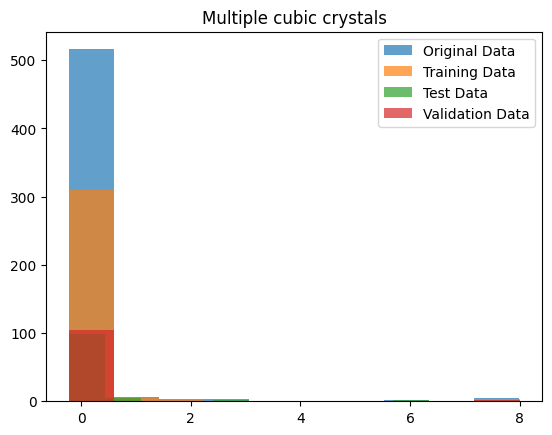

<Figure size 600x800 with 0 Axes>

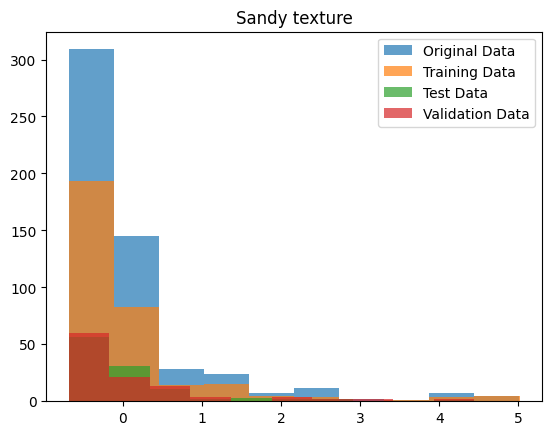

<Figure size 600x800 with 0 Axes>

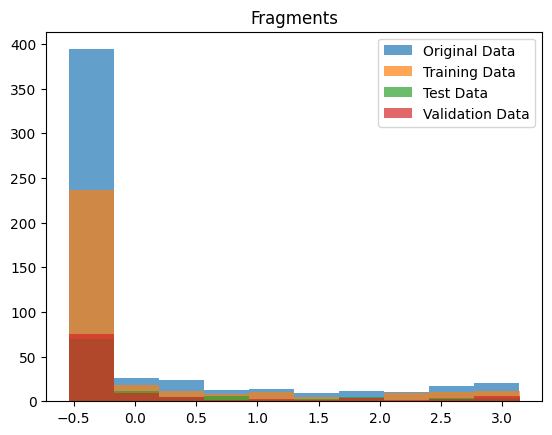

<Figure size 600x800 with 0 Axes>

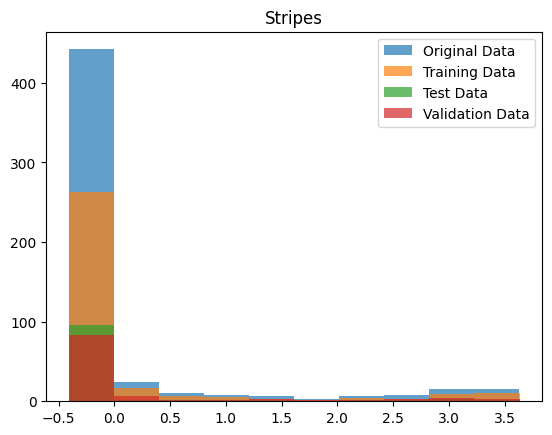

<Figure size 600x800 with 0 Axes>

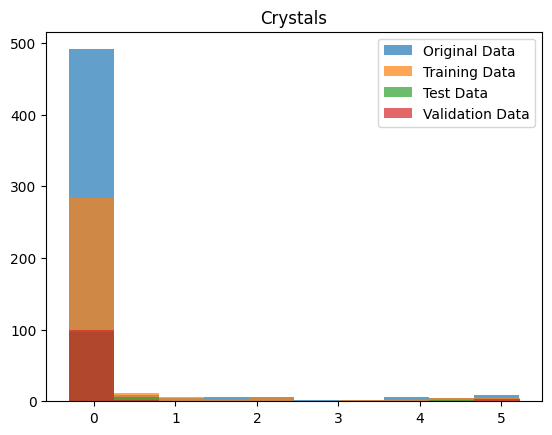

<Figure size 600x800 with 0 Axes>

In [ ]:
# In order to verify whether the datasets are representative of the entire␣

# Plotting histogram of every Column for Original, Test, Train & Validation data
for cols in X.columns:
  fig, ax = plt.subplots()
  ax.hist(X[cols], alpha = 0.7, label = "Original Data")
  ax.hist(X_train[cols], alpha = 0.7, label = "Training Data")
  ax.hist(X_test[cols], alpha = 0.7, label = "Test Data")
  ax.hist(X_valid[cols], alpha = 0.7, label = "Validation Data")
  ax.legend()
  plt.title(cols)
  plt.figure(figsize=(6,8))

## Comments

By using the dataframe.describe function we can check whether the dataset splits are representative of the entire dataset.

#**Q4) Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution):**
*  **Multinomial Logistic Regression (softmax regression); hyperparameters to explore: C, solver, max number of iterations.**
*  **Support vector machines (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.**
*  **Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node**

To try the different values if hyperparameters I have made use of Grid Search. And the displayed classification report is based on the best hyperparameter values given by GridSearchCV. This is true for every model that we were asked to implement.

In [ ]:
def evaluate_model(model, x, y):
    y_pred = model.predict(x)
    print(classification_report(y_pred, y))

The function is used to evaluate the model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from  sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Parameter grid for GridSearch

In [ ]:
param_grid_log = {
    'C': [ 0.05, 0.07, 0.1, 0.5, 1],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [50, 100,200, 500]
}

param_grid_svm = {
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10],
    'kernel': ['linear', 'sigmoid', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

param_grid_poly = {
    'kernel': ['poly'],
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, 1,3, 5,10],
    'degree': [2, 3, 4],
    'coef0': [-2,-1,0, 1,2,3,4,5],
}

param_grid_rf = {
    'n_estimators': [100,200,300],
    'max_depth': [None,10, 20, 30,40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
logistic_reg = LogisticRegression(multi_class='multinomial', max_iter=1000)


grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid_log, scoring='balanced_accuracy' )
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(best_params)

print("Training")
evaluate_model(best_model, X_train, y_train)

print("Validation")
evaluate_model(best_model, X_valid, y_valid)

print("Testing")
evaluate_model(best_model, X_test, y_test)

{'C': 1, 'max_iter': 50, 'solver': 'newton-cg'}
Training
              precision    recall  f1-score   support

           1       0.70      0.72      0.71        96
           2       0.71      0.73      0.72       111
           3       0.76      0.73      0.74       117

    accuracy                           0.73       324
   macro avg       0.72      0.72      0.72       324
weighted avg       0.73      0.73      0.73       324

Validation
              precision    recall  f1-score   support

           1       0.65      0.70      0.67        40
           2       0.68      0.70      0.69        30
           3       0.68      0.61      0.64        38

    accuracy                           0.67       108
   macro avg       0.67      0.67      0.67       108
weighted avg       0.67      0.67      0.67       108

Testing
              precision    recall  f1-score   support

           1       0.77      0.77      0.77        39
           2       0.66      0.77      0.71        30

Optimization Algorithms for Logistic Regression:

'newton-cg': Uses Newton's method with conjugate gradient. Suitable for small to medium-sized, well-conditioned datasets.

'lbfgs': A quasi-Newton method, good for large datasets with limited memory.

'sag': Stochastic optimization algorithm, useful for large datasets with quick convergence.

'saga': An extension of SAG, suitable for various problems, especially with L1 (Lasso) or elastic-net regularization.

C (Regularization Parameter):

Controls regularization in logistic regression.
Smaller C = stronger regularization, preventing overfitting (may lead to underfitting if too low).
Larger C = weaker regularization, fitting training data closely (may lead to overfitting if too high).

max_iter (Maximum Number of Iterations):

Specifies the maximum optimization steps for logistic regression.
Increase max_iter if the model is not converging.

# Support Vector Machine

In [ ]:
svm_classifier = SVC()


grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm, scoring='balanced_accuracy')
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(best_params)

print("Training")
evaluate_model(best_model, X_train, y_train)

print("Validation")
evaluate_model(best_model, X_valid, y_valid)

print("Testing")
evaluate_model(best_model, X_test, y_test)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Training
              precision    recall  f1-score   support

           1       0.87      0.83      0.85       103
           2       0.75      0.83      0.78       103
           3       0.87      0.82      0.84       118

    accuracy                           0.82       324
   macro avg       0.83      0.82      0.82       324
weighted avg       0.83      0.82      0.83       324

Validation
              precision    recall  f1-score   support

           1       0.77      0.89      0.82        37
           2       0.81      0.78      0.79        32
           3       0.82      0.72      0.77        39

    accuracy                           0.80       108
   macro avg       0.80      0.80      0.80       108
weighted avg       0.80      0.80      0.79       108

Testing
              precision    recall  f1-score   support

           1       0.82      0.82      0.82        39
           2       0.63      0.73      0.68        30
       

SVM with Polynomial Kernel

In [ ]:
svm_classifier = SVC()


grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_poly, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(best_params)

print("Training")
evaluate_model(best_model, X_train, y_train)

print("Validation")
evaluate_model(best_model, X_valid, y_valid)

print("Testing")
evaluate_model(best_model, X_test, y_test)

{'C': 3, 'coef0': 5, 'degree': 2, 'kernel': 'poly'}
Training
              precision    recall  f1-score   support

           1       0.88      0.84      0.86       102
           2       0.77      0.81      0.79       109
           3       0.82      0.81      0.82       113

    accuracy                           0.82       324
   macro avg       0.82      0.82      0.82       324
weighted avg       0.82      0.82      0.82       324

Validation
              precision    recall  f1-score   support

           1       0.79      0.81      0.80        42
           2       0.71      0.81      0.76        27
           3       0.82      0.72      0.77        39

    accuracy                           0.78       108
   macro avg       0.77      0.78      0.78       108
weighted avg       0.78      0.78      0.78       108

Testing
              precision    recall  f1-score   support

           1       0.79      0.78      0.78        40
           2       0.60      0.70      0.65      

Kernel Types in Scikit-Learn SVM:

'linear': Simple linear transformation, suitable for linearly separable data.

'sigmoid': Non-linear, uses the hyperbolic tangent function.

'rbf' (Radial Basis Function): Widely used non-linear kernel, captures complex non-linear patterns.

C (Regularization Parameter):

Small C emphasizes maximizing margin, useful for noisy data (soft-margin).
Large C reduces margin, suitable for noise-free, well-separated data (hard-margin).

Gamma (Kernel Coefficient):

Small gamma results in a smoother, general decision boundary, helps prevent overfitting (suitable for large, well-separated datasets).
Large gamma makes the decision boundary more flexible and better at capturing intricate patterns, but can lead to overfitting (suitable for smaller, complex datasets)



## Random Forest

In [ ]:
random_forest_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=random_forest_classifier, param_grid=param_grid_rf, scoring='balanced_accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(best_params)

print("Training")
evaluate_model(best_model, X_train, y_train)

print("Validation")
evaluate_model(best_model, X_valid, y_valid)

print("Testing")
evaluate_model(best_model, X_test, y_test)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training
              precision    recall  f1-score   support

           1       0.99      1.00      0.99        97
           2       0.99      0.99      0.99       114
           3       1.00      0.99      1.00       113

    accuracy                           0.99       324
   macro avg       0.99      0.99      0.99       324
weighted avg       0.99      0.99      0.99       324

Validation
              precision    recall  f1-score   support

           1       0.81      0.90      0.85        39
           2       0.84      0.70      0.76        37
           3       0.74      0.78      0.76        32

    accuracy                           0.80       108
   macro avg       0.80      0.79      0.79       108
weighted avg       0.80      0.80      0.79       108

Testing
              precision    recall  f1-score   support

           1       0.74      0.78      0.76        37
           2   

n_estimators:

The number of decision trees in the Random Forest.
Increasing n_estimators generally improves model performance, but it may lead to longer training times.
It helps reduce overfitting and provides more stable predictions.

max_depth:

The maximum depth of each decision tree in the Random Forest.
A larger max_depth can lead to more complex trees that capture intricate patterns in the data, but it increases the risk of overfitting.
Smaller values promote simpler trees, reducing the risk of overfitting.

min_samples_split:

The minimum number of samples required to split a node in a decision tree.
A smaller min_samples_split results in more splits and finer-grained trees, which can lead to overfitting.
A larger value enforces more samples in a node to allow a split, which can make the trees more robust against noise.

min_samples_leaf:

The minimum number of samples required to be in a leaf node of a decision tree.
Smaller min_samples_leaf values result in more detailed leaves and risk overfitting.
Larger values make the leaves more general and reduce the risk of overfitting.

## Feature Selection

Random Forest is a powerful ensemble learning algorithm that can be used for feature selection. Here's a concise theory of how it works:

Feature Importance Scores:

Random Forest calculates a feature importance score for each feature in the dataset.
This score measures how much each feature contributes to the overall predictive accuracy of the model.
Features that have a higher score are considered more important, while those with lower scores are less important

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Conchoidal fracture                    0.119158
Salient green huePegmatitic texture    0.091757
Physical layers                        0.082771
Presence of holes                      0.081626
Sandy texture                          0.073778
Splotchy texture                       0.070880
Fragments                              0.070710
Porphyritic texture                    0.069980
Oily/shimmery texture                  0.056273
Stripes                                0.048966
Angular fragments                      0.042053
Crystals                               0.041751
Veins                                  0.036751
Rounded fragments                      0.027170
Curved stripes                         0.026167
Single translucent crystal             0.025298
Straight stripes                       0.021642
Multiple cubic crystals                0.013269
dtype: float64

"Conchoidal fracture" has the highest importance score of 0.119158, indicating it is considered the most important feature among the listed ones for the specific task or model.

"Salient green huePegmatitic texture,"
"Physical layers," and "Presence of holes" also have relatively high importance scores, suggesting they are among the more relevant features.

"Multiple cubic crystals" has the lowest importance score of 0.013269, indicating it may have the least impact on the task or model.

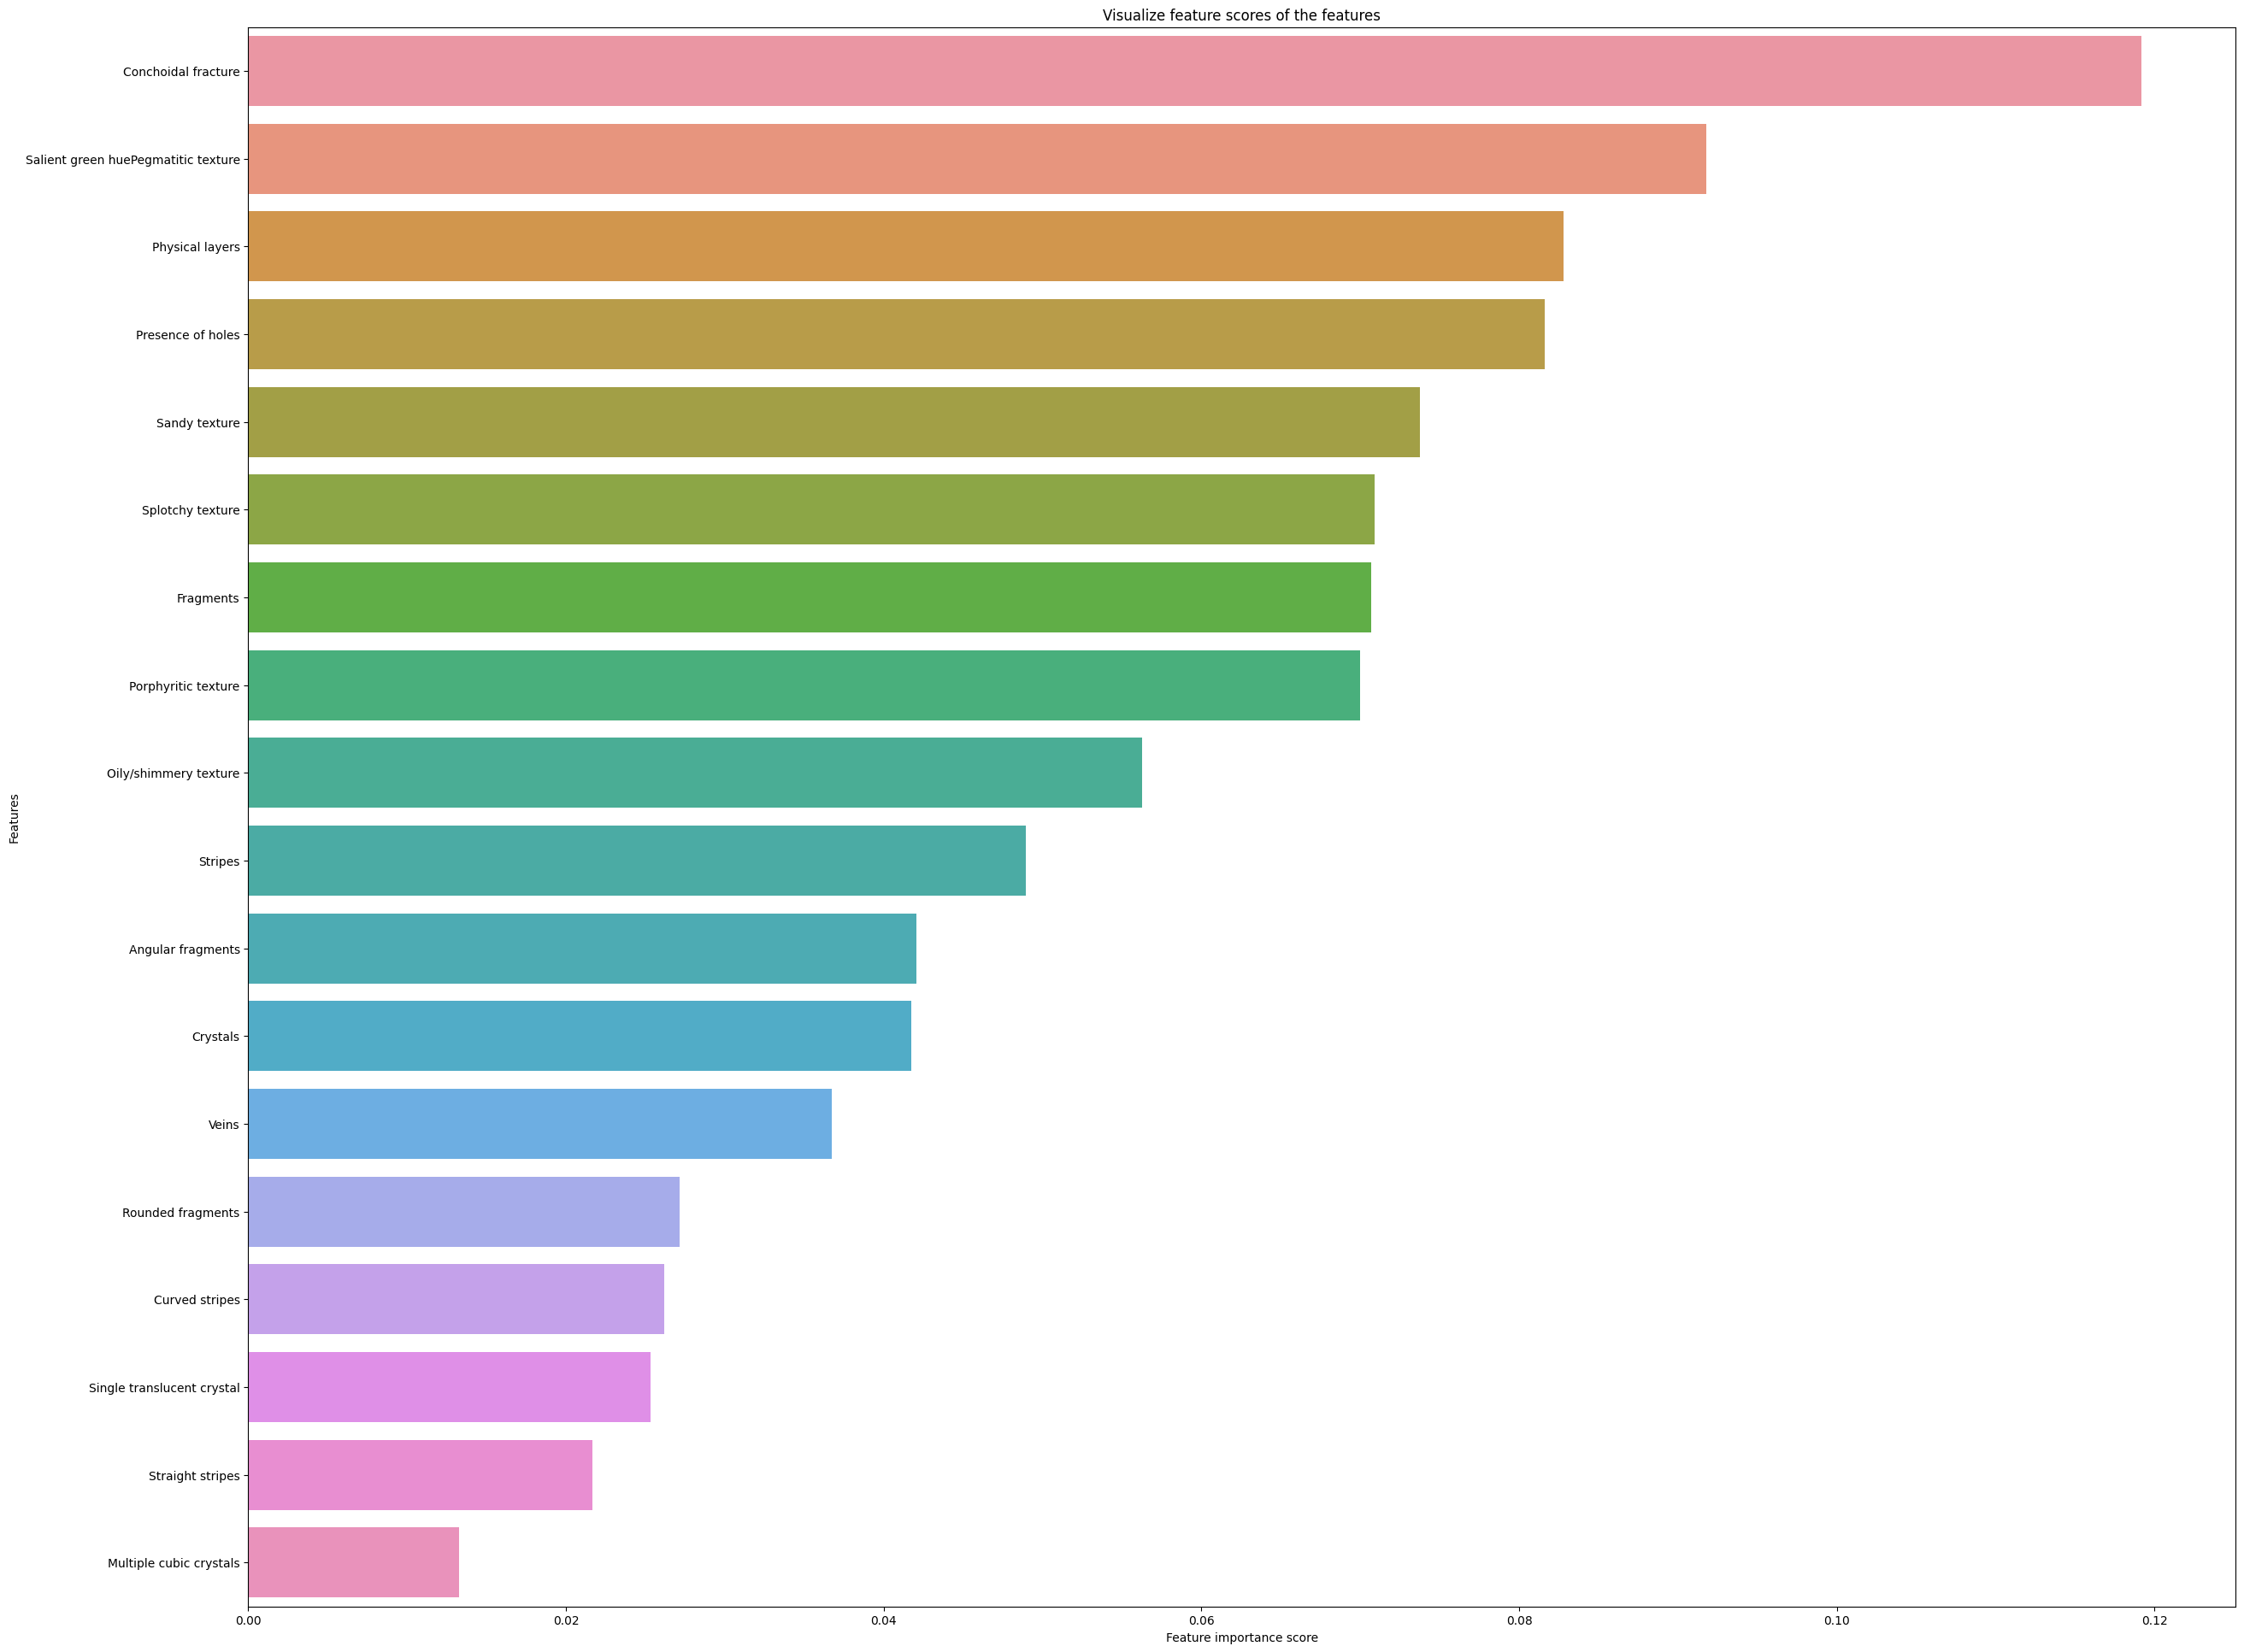

In [ ]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

## **5) Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set (try to get above 80% accuracy). Once you have found a good one, try it on the test set. Describe and discuss your findings.**

We have implndemented an Ensemble Classifier and Stacking

The combined classifiers are tuned with best performing models hyperparameters.

In [ ]:
from sklearn.ensemble import VotingClassifier,StackingClassifier

clf1 = LogisticRegression(multi_class='multinomial', C= 0.05, max_iter= 50, solver= 'newton-cg')

clf2 = SVC(C= 5, gamma= 'scale', kernel= 'rbf')

clf3 = RandomForestClassifier( max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100)

ensemble_clf = VotingClassifier(estimators=[('lr', clf1), ('svm',clf2), ('rf', clf3)], voting='hard')

stacking_clf = StackingClassifier(estimators=[('lr', clf1), ('svm',clf2), ('rf', clf3)], cv= 5,final_estimator=clf2)

ensemble_clf.fit(X_train, y_train)


print("Validation\n")
evaluate_model(ensemble_clf, X_valid, y_valid)
print("Testing\n")
evaluate_model(ensemble_clf, X_test, y_test)

stacking_clf.fit(X_train, y_train)

print("Validation\n")
evaluate_model(stacking_clf, X_valid, y_valid)
print("Testing\n")
evaluate_model(stacking_clf, X_test, y_test)

Validation

              precision    recall  f1-score   support

           1       0.79      0.89      0.84        38
           2       0.81      0.78      0.79        32
           3       0.76      0.68      0.72        38

    accuracy                           0.79       108
   macro avg       0.79      0.79      0.79       108
weighted avg       0.79      0.79      0.78       108

Testing

              precision    recall  f1-score   support

           1       0.85      0.82      0.84        40
           2       0.71      0.83      0.77        30
           3       0.82      0.74      0.78        38

    accuracy                           0.80       108
   macro avg       0.79      0.80      0.79       108
weighted avg       0.80      0.80      0.80       108

Validation

              precision    recall  f1-score   support

           1       0.79      0.85      0.82        40
           2       0.81      0.81      0.81        31
           3       0.79      0.73      0.7

#Discussion

1) Accuracy of the Ensemble is 81 and 80 for both training and validation. Which is Greater that the 3 classifiers which have 95 or lesser accuracy on test and val data

2) The stacking classifier gives better results that the Hard voting classifier. As expected as a stacking classifier typically gives better results than a hard voting classifier because it leverages the strengths of multiple base classifiers to make predictions.